# 0.0 Research Question

With 628,035,553 worldwide cases reported, COVID-19 has placed global healthcare infrastructure under sustained pressure. Unanticipated case numbers overwhelmed existing provision, exacerbated by insufficient equipment to treat patients or medical supplies to protect staff. Such conditions can inadvertently lead to avoidable deaths, as seen in a study finding surges of critical patients in China resulted in up to 53.2% of patients not receiving needed ventilation due to resource limitations. These issues could be compounded due to the fragility of longer distance supply chains during the pandemic and in Indonesia specifically due to the dispersion of its population across 17,508 islands. Therefore, if anticipating COVID-19 deaths could reduce deaths through better healthcare planning, are we able to facilitate this by accurately forecast regional deaths from reported figures?

# 1.0 Preparation

### | 1.1 Libraries

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

### | 1.2 Functions

In [10]:
# calculates and returns evaluation metrics
def evaluate(model, X, y):  

    methods = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_median_absolute_error', 'r2']
    scores = []

    for method in methods:
    
        calculated = cross_val_score(model, X, y, cv=folds, scoring=method).mean()
        scores.append(calculated)
    
    return scores

### | 1.3 Graphs

In [11]:
# colors
data_color = "#313131" # grey
model_color = "#00bbf9" # blue
background_color = "#f5f5f5" #light grey
grid_color = "#DADADA" # mid grey

# graphs
graph_width = 18
graph_height = 5

### | 1.4 Data

In [12]:
data = pd.read_csv("./data/national_cleaned.csv", index_col=0)

# check data is loaded as expected
pd.set_option("display.max_columns", None)
data.head()

,Date,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,Total Active Cases,Increasing
0,2020-03-02,Indonesia,2.0,0.0,0.0,2,2,0,0,2,0
1,2020-03-03,Indonesia,0.0,0.0,0.0,0,2,0,0,2,0
2,2020-03-04,Indonesia,0.0,0.0,0.0,0,2,0,0,2,0
3,2020-03-05,Indonesia,0.0,0.0,0.0,0,2,0,0,2,0
4,2020-03-06,Indonesia,2.0,0.0,0.0,2,4,0,0,4,0


In [13]:
# check number of columns and rows matches the source
data.shape

(642, 11)

# 3.0 Feature Selection

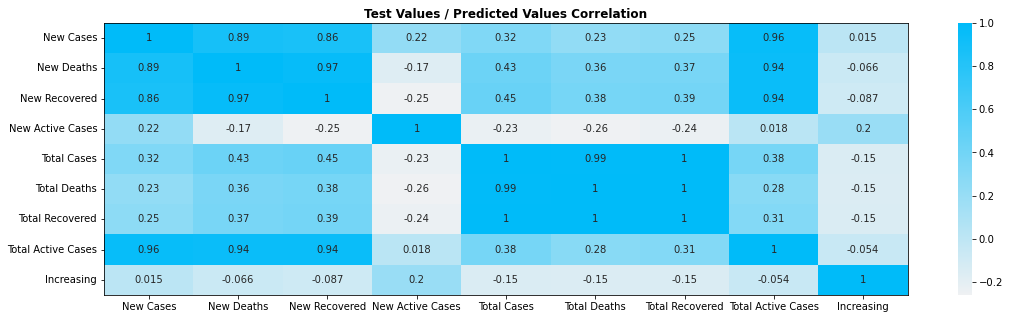

In [14]:
# display settings for the plot
plt.figure(figsize=(graph_width,graph_height))
ax = plt.axes()
ax.set_title("Test Values / Predicted Values Correlation",fontweight='bold')

# plot heatmap
features = sns.heatmap(data.corr(), annot=True, cmap=sns.light_palette(model_color, as_cmap=True));

# adds border to heatmap
for _, spine in features.spines.items():
    spine.set_visible(True)

In [15]:
# remove target attributes categorical attributes and attributes with weak or no correlation
filtered = data.drop(["Date", "Location", "New Cases", "New Deaths", "New Recovered", "New Active Cases", "Total Recovered", "Total Active Cases", "Increasing"], axis = 1)

# 4.0 Training Data

### | 4.1 Transforming

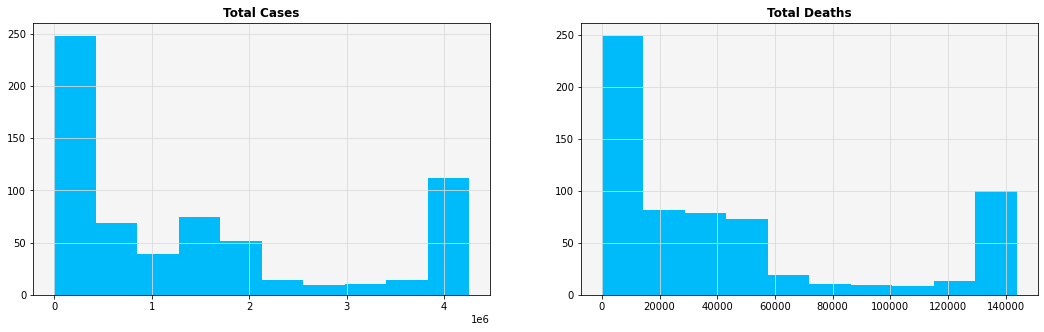

In [16]:
# display settings for the plot
fig, afiltered = plt.subplots(1,2)
fig.set_figwidth(graph_width)
fig.set_figheight(graph_height)


k=0
for i in range(2):

    afiltered[i].set_title(filtered.columns[k],fontweight='bold')
    afiltered[i].hist(filtered[filtered.columns[k]], color=model_color)
    
    afiltered[i].set_facecolor(background_color)
    afiltered[i].grid(color=grid_color)
        
    k+=1

In [17]:
transformer = QuantileTransformer(output_distribution='normal')

filtered = transformer.fit_transform(filtered)

filtered = pd.DataFrame(filtered, columns=['Total Cases','Total Deaths'])

C:\Users\Neil\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2612: UserWarning: n_quantiles (1000) is greater than the total number of samples (642). n_quantiles is set to n_samples.
  warnings.warn("n_quantiles (%s) is greater than the total number "


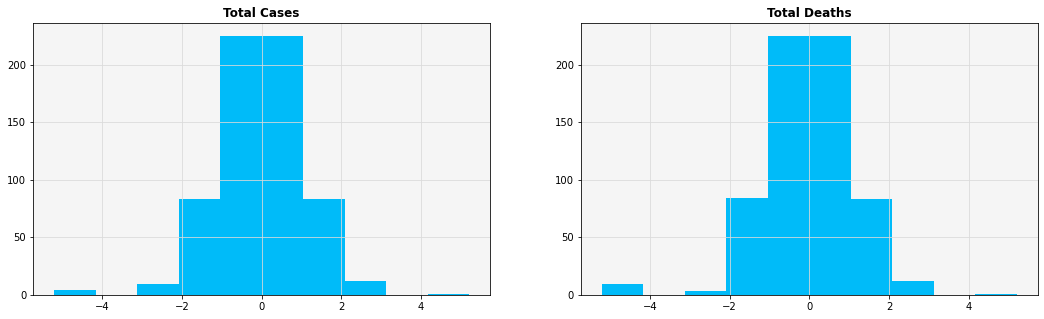

In [18]:
# display settings for the plot
fig, afiltered = plt.subplots(1,2)
fig.set_figwidth(graph_width)
fig.set_figheight(graph_height)


k=0
for i in range(2):

    afiltered[i].set_title(filtered.columns[k],fontweight='bold')
    afiltered[i].hist(filtered[filtered.columns[k]], color=model_color)
    
    afiltered[i].set_facecolor(background_color)
    afiltered[i].grid(color=grid_color)
        
    k+=1

### | 4.2 Scaling

In [19]:
sc = StandardScaler()

# scaling filtered dataframe data due to distance based SVR being used
filtered = sc.fit_transform(filtered)

# reform dataframe with scaled values
filtered = pd.DataFrame(filtered, columns=['Total Cases','Total Deaths'])

### | 4.3 Filtering

In [34]:
# remove target attributes categorical attributes and attributes with weak or no correlation
X = filtered["Total Cases"].values.reshape(-1, 1) 

# target attribute
y = filtered['Total Deaths'].values.reshape(-1, 1) 

### | 4.3 Cross Validation

In [35]:
# number of folds for cross validation
folds = 10

#  5.0 Linear Regression

### | 5.1 Model

In [36]:
# create model and use cross validation data
lnr = LinearRegression()
lnr_predictions = cross_val_predict(lnr, X, y, cv=folds)

### | 5.2 Test / Prediction Correlation

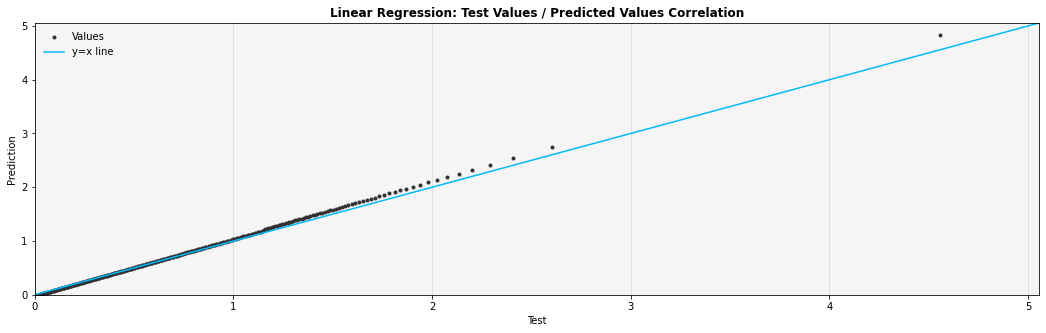

In [37]:
# display settings for the plot
plt.figure(figsize=(graph_width,graph_height))
ax = plt.axes()
ax.axes.set_facecolor(background_color)
ax.grid(color=grid_color, linestyle='-', axis='x')
ax.set_title("Linear Regression: Test Values / Predicted Values Correlation",fontweight='bold')
ax.set(xlabel='Test', ylabel='Prediction')

# plots the test and prediction values
plt.plot(y,lnr_predictions,'.',label = 'Values', color=data_color)

# plot y = x line
x_line = np.linspace(0,500)
y_line = x_line
plt.plot(x_line,y_line,'-',label = 'y=x line', color=model_color)

# legend location and appearance
plt.legend(loc='upper left', frameon=False);

# puts 0,0 in bottom left
plt.xlim([0, max(y)+0.5])
plt.ylim([0, max(y)+0.5]);

### | 5.3 Evaluation

In [38]:
results = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2'])

lnr_scores = evaluate(lnr, X, y)

results.loc[len(results.index)] = ["Linear Regression", lnr_scores[0], lnr_scores[1], lnr_scores[2], lnr_scores[3]]
results

,Model,MSE,RMSE,MAE,R2
0,Linear Regression,-0.049057,-0.102871,-0.032553,0.804703


# 6.0 SVR

### | 6.1 Model

In [46]:
X=X.ravel()
y=y.ravel().reshape(-1,1)
X

array([-4.82912575e+00, -4.82912575e+00, -4.82912575e+00, -4.82912575e+00,
       -2.27574467e+00, -2.27574467e+00, -2.17784098e+00, -2.12392570e+00,
       -2.07634328e+00, -2.01383460e+00, -2.01383460e+00, -1.95930947e+00,
       -1.92639656e+00, -1.89574084e+00, -1.86702324e+00, -1.83998891e+00,
       -1.81443099e+00, -1.79017915e+00, -1.76709144e+00, -1.74504822e+00,
       -1.72394773e+00, -1.70370263e+00, -1.68423742e+00, -1.66548631e+00,
       -1.64739167e+00, -1.62990270e+00, -1.61297436e+00, -1.59656658e+00,
       -1.58064347e+00, -1.56517284e+00, -1.55012562e+00, -1.53547553e+00,
       -1.52119869e+00, -1.50727337e+00, -1.49367969e+00, -1.48039947e+00,
       -1.46741597e+00, -1.45471383e+00, -1.44227882e+00, -1.43009782e+00,
       -1.41815866e+00, -1.40645002e+00, -1.39496139e+00, -1.38368297e+00,
       -1.37260561e+00, -1.36172075e+00, -1.35102036e+00, -1.34049695e+00,
       -1.33014343e+00, -1.31995319e+00, -1.30991995e+00, -1.30003783e+00,
       -1.29030126e+00, -

In [44]:
svr = SVR(C=1, kernel='linear')
svr_predictions = cross_val_predict(svr, X, y, cv=folds)

C:\Users\Neil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Neil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Neil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Neil\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

### | 6.2 Test / Prediction Correlation

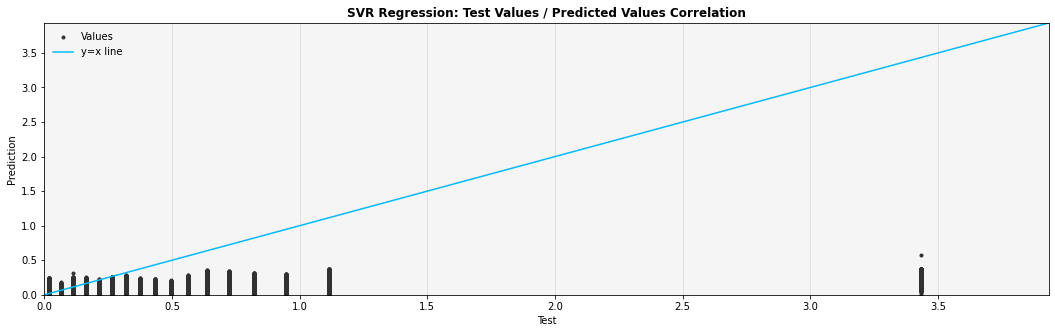

In [24]:
# display settings for the plot
plt.figure(figsize=(graph_width,graph_height))
ax = plt.axes()
ax.axes.set_facecolor(background_color)
ax.grid(color=grid_color, linestyle='-', axis='x')
ax.set_title("SVR Regression: Test Values / Predicted Values Correlation",fontweight='bold')
ax.set(xlabel='Test', ylabel='Prediction')

# plots the test and prediction values
plt.plot(y,svr_predictions,'.',label = 'Values', color=data_color)

# plot y = x line
x_line = np.linspace(0,500)
y_line = x_line
plt.plot(x_line,y_line,'-',label = 'y=x line', color=model_color)

# legend location and appearance
plt.legend(loc='upper left', frameon=False);

# puts 0,0 in bottom left
plt.xlim([0, max(y)+0.5])
plt.ylim([0, max(y)+0.5]);

### | 6.3 Evaluation

In [25]:
svr_scores = evaluate(svr, X, y)

results.loc[len(results.index)] = ["SVR", svr_scores[0], svr_scores[1], svr_scores[2], svr_scores[3]]

results[results['Model'] == "SVR"]

,Model,MSE,RMSE,MAE,R2
1,SVR,-0.949168,-0.973929,-0.443309,0.050891


#  7.0 Evaluation Comparison

In [26]:
results.set_index('Model').rename_axis(None)

,MSE,RMSE,MAE,R2
Linear Regression,-0.953267,-0.975156,-0.456212,0.048085
SVR,-0.949168,-0.973929,-0.443309,0.050891


# 8.0 Visualisations

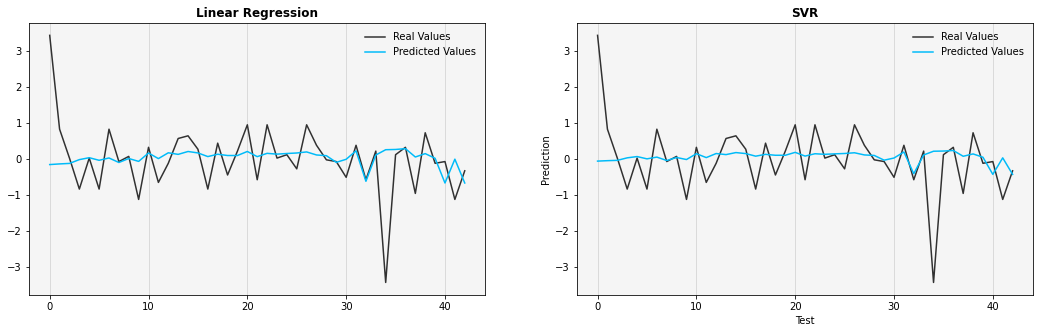

In [30]:
predictions = pd.DataFrame({'Linear Real':y, 'Linear Predicted':lnr_predictions, 'SVR Real':y, 'SVR Predicted':svr_predictions})

# plot values using a step for clarity
step=500

# display settings for the plot
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(graph_width)
fig.set_figheight(graph_height)

# plots the linear regression graph real and prediction values
ax[0].set_title("Linear Regression",fontweight='bold')
ax[0].plot(predictions['Linear Real'].values[::step], label = 'Real Values', color=data_color)
ax[0].plot(predictions['Linear Predicted'].values[::step], label = 'Predicted Values', color=model_color)

# plots the svr real and prediction values
ax[1].set_title("SVR",fontweight='bold')
ax[1].plot(predictions['SVR Real'].values[::step], label = 'Real Values', color=data_color)
ax[1].plot(predictions['SVR Predicted'].values[::step], label = 'Predicted Values', color=model_color)
ax[1].set(xlabel='Test', ylabel='Prediction')

# sub plot appearance settings
for i in range(2):
    ax[i].set_facecolor(background_color)
    ax[i].grid(color=grid_color, linestyle='-', linewidth=1, axis='x')
    ax[i].legend(frameon=False);